In [1]:
import pickle
import datetime as dt
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FAST_Epochs, L_SMLT = pickle.load(open('c:/Users/Conrad/Documents/GitHub/FAST-and-IMAGE/FAST_states_pickled.p','r'))

In [3]:
IMAGE_Epochs, aTAs = pickle.load(open('c:/Users/Conrad/Documents/GitHub/FAST-and-IMAGE/IMAGE_states_pickled.p','r'))

In [4]:
def find_boundaries(epoch_list,gap_time):
    boundaries = [[epoch_list[0],-1]]
    last_epoch = epoch_list[0]
    counter    = 0
    for e in epoch_list:
        if e - last_epoch > gap_time:
            boundaries[counter][1] = last_epoch
            new_record             = [e,-1]
            boundaries.append(new_record)
            counter = counter + 1
        last_epoch = e
    boundaries[-1][1] = e
    
    return boundaries

In [5]:
def mask_SMLTs(L_SMLTs):
    N    = len(L_SMLTs)
    mask = []
    counter = 0
    for l in L_SMLTs:
        if (8.0 > l > 2.0) or (20.0 > l > 14.0):
            mask.append(counter)
        counter = counter + 1
        
    return np.array(mask)

In [6]:
FAST_mask = mask_SMLTs(L_SMLT)

In [7]:
#for whatever reason - this doesn't work
#FAST_Mask = np.where(L_SMLT[np.logical_or(np.logical_and(L_SMLT > 2.0,L_SMLT < 8.0),np.logical_and(L_SMLT > 14.0,L_SMLT < 20.0))])[0]

In [8]:
FAST_mask[600:700]

array([ 600,  601,  602,  603,  604,  605,  606,  607,  608,  609,  610,
        611,  612,  613,  614,  615,  616,  617,  618,  619,  620,  621,
        622,  623,  624,  625,  626,  627,  628,  629,  630,  631,  632,
        633,  634,  635,  636,  637,  638,  639,  640,  641,  642,  643,
        644,  645,  646,  647,  648,  649,  650,  651,  652,  653,  654,
        655,  656,  657,  658,  659,  660,  661,  662,  663,  664,  665,
        666,  667,  668,  669,  670,  671,  672,  673,  674,  675,  676,
        677,  678,  679,  680,  681,  682,  683,  684,  689,  690,  691,
        692, 1305, 1314, 1315, 1316, 1324, 1325, 1326, 1327, 1328, 1334,
       1335])

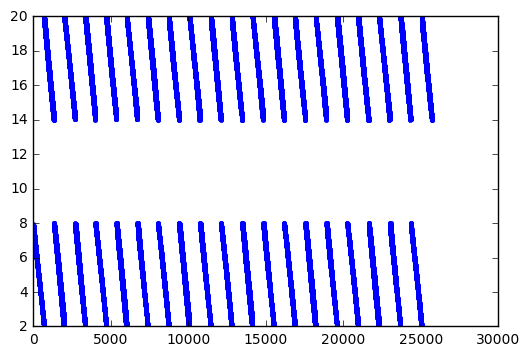

In [9]:
plt.plot(L_SMLT[FAST_mask],'b.')

In [10]:
FAST_view_Epochs = FAST_Epochs[FAST_mask]

In [11]:
FAST_view_Epochs.shape

(25723L,)

In [12]:
FAST_gap_size = dt.timedelta(seconds=2*86400)
FAST_boundaries = find_boundaries(FAST_view_Epochs,FAST_gap_size)

In [13]:
FAST_boundaries[1]

[datetime.datetime(1996, 12, 20, 2, 3, 35, 648880),
 datetime.datetime(1997, 2, 21, 12, 48, 44, 605484)]

In [14]:
print FAST_view_Epochs[0]

1996-08-21 10:30:00


In [15]:
len(FAST_boundaries)

38

In [16]:
for b in FAST_boundaries:
    print b[0],'\t\t', b[1]

1996-08-21 10:30:00 		1996-10-24 09:26:42.353191
1996-12-20 02:03:35.648880 		1997-02-21 12:48:44.605484
1997-04-24 11:57:35.496178 		1997-06-29 00:54:07.560406
1997-08-26 06:30:31.833782 		1997-11-02 11:38:19.047165
1997-12-26 21:27:53.135662 		1998-02-27 09:44:43.970451
1998-05-01 08:54:27.329788 		1998-07-04 20:24:26.486015
1998-09-02 14:02:58.944082 		1998-11-08 07:21:40.511761
1999-01-02 00:15:32.113152 		1999-03-06 16:31:58.536053
1999-05-07 14:08:50.704575 		1999-07-11 23:03:33.753128
1999-09-09 04:52:36.027298 		1999-11-15 11:41:12.368393
2000-01-06 22:59:30.724716 		2000-03-11 06:58:42.387009
2000-05-11 12:27:56.627121 		2000-07-14 19:37:53.221207
2000-09-13 13:35:25.139599 		2000-11-17 11:57:47.831497
2001-01-10 23:21:52.665691 		2001-03-15 17:50:56.937675
2001-05-15 14:19:41.476707 		2001-07-19 00:28:01.223831
2001-09-17 03:25:17.123184 		2001-11-22 09:56:47.910995
2002-01-12 22:39:18.076096 		2002-03-18 05:47:44.526596
2002-05-17 11:08:00.903091 		2002-07-19 21:03:03.083115

In [17]:
IMAGE_mask = np.where(aTAs <= 30.0)

In [18]:
IMAGE_view_Epochs = IMAGE_Epochs[IMAGE_mask]

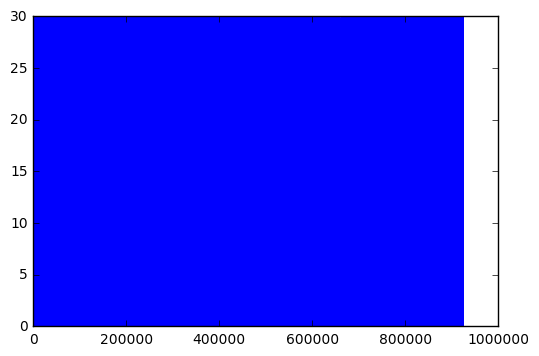

In [19]:
plt.plot(aTAs[IMAGE_mask])

In [20]:
IMAGE_mask[0][0:200]

array([138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 31

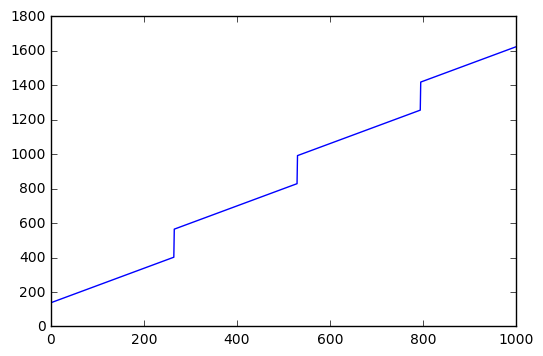

In [21]:
plt.plot(IMAGE_mask[0][0:1000])

In [22]:
IMAGE_gap = dt.timedelta(seconds = 3*60)
IMAGE_boundaries = find_boundaries(IMAGE_view_Epochs,IMAGE_gap)

In [23]:
len(IMAGE_boundaries)

3531

In [24]:
combined_boundaries = []

for ib in IMAGE_boundaries:
    for fb in FAST_boundaries:
        if ib[0] > fb[0] and ib[1] < fb[1]:\
            combined_boundaries.append(ib)

In [26]:
for cb in combined_boundaries:
    print cb[0],'\t\t', cb[1]

2000-05-11 20:32:00 		2000-05-12 05:16:00
2000-05-12 10:46:00 		2000-05-12 19:30:00
2000-05-13 01:00:00 		2000-05-13 09:44:00
2000-05-13 15:14:00 		2000-05-13 23:58:00
2000-05-14 05:28:00 		2000-05-14 14:12:00
2000-05-14 19:42:00 		2000-05-15 04:26:00
2000-05-15 09:56:00 		2000-05-15 18:40:00
2000-05-16 00:10:00 		2000-05-16 08:54:00
2000-05-16 14:24:00 		2000-05-16 23:08:00
2000-05-17 04:38:00 		2000-05-17 13:22:00
2000-05-17 18:52:00 		2000-05-18 03:36:00
2000-05-18 09:06:00 		2000-05-18 17:50:00
2000-05-18 23:20:00 		2000-05-19 08:04:00
2000-05-19 13:34:00 		2000-05-19 22:18:00
2000-05-20 03:48:00 		2000-05-20 12:32:00
2000-05-20 18:02:00 		2000-05-21 02:44:00
2000-05-21 08:16:00 		2000-05-21 16:58:00
2000-05-21 22:30:00 		2000-05-22 07:12:00
2000-05-22 12:44:00 		2000-05-22 21:26:00
2000-05-23 02:58:00 		2000-05-23 11:40:00
2000-05-23 17:12:00 		2000-05-24 01:54:00
2000-05-24 07:26:00 		2000-05-24 16:08:00
2000-05-24 21:38:00 		2000-05-25 06:22:00
2000-05-25 11:52:00 		2000-05-25 2

In [27]:
len(combined_boundaries)

1833

In [46]:
combined_viewing = open('c:/Users/Conrad/Documents/GitHub/FAST-and-IMAGE/combined_viewing.txt','w+')
output_format = '%Y-%m-%d %H:%M:%S'
for cb in combined_boundaries:
    output_string = '%s,%s\n' % (dt.datetime.strftime(cb[0],output_format),dt.datetime.strftime(cb[1],output_format))
    combined_viewing.write(output_string)
combined_viewing.close()

In [49]:
fast_viewing = open('c:/Users/Conrad/Documents/GitHub/FAST-and-IMAGE/fast_viewing.txt','w+')
output_format = '%Y-%m-%d %H:%M:%S'
for fb in FAST_boundaries:
    output_string = '%s,%s\n' % (dt.datetime.strftime(fb[0],output_format),dt.datetime.strftime(fb[1],output_format))
    fast_viewing.write(output_string)
fast_viewing.close()